<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/Dimensional_Reduction_PCA%2C_UMAP_%2Cetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction (DR)** is the process of reducing the number of input features under consideration and focus on a set of principal features.

Feature selection: apply statistical tests to infer the importance of the features and retain a subset. Implies information loss and less stability.
Feature extraction: create new independent features as combination of the original features. Linear and non-linear methodologies.

**PCA**
PCA is the most widely used algorithm for dimensionality reduction. It works as follows:

Identifies the hyperplane that lies closest to the data (preserve the variance);
Projects the data onto the hyperplane;
It can make use of Singular Value Decomposition (SVD), a standard matrix factorization to find the principal components.

**MDS**
MDS maps the distances between the objects in k-dimensions. The distances can be pre-calculated or derived from a correlation matrix. It calculates dissimilarities and returns a set of points such that the distances between the points are approximately equal to the dissimilarities. MDS can be metric or non-metric. In the metric version it tries to reproduce original metric or distance. In the non-metric version it assumes the ranks of the distances.

**tSNE**
tSNE is a non-linear DR technique. The method tries to keep similar instances close to each other and dissimilar ones apart. It focus on retaining the structure of neighboring points. t-SNE is widely used for visualization of high-dimensional spaces.

**UMAP**
Non-linear DR technique. Is a very effective technique to visualize clusters but can also be applied for prediction. Scales well (e.g. w.r.t. t-SNE). It can be applied directly to sparse matrices. Tends to preserve both local and global structure of data.

**SVD**

**ISOMap**

**LLE**

**Dataset source**-https://archive.ics.uci.edu/dataset/53/iris

**Iris dataset**
To demonstrate the application of these four methods we will use the iris dataset a widely used dataset in ML for demonstration purposes. It consists of measurements in centimetres of four variables and one class. Variable are:

sepal length and sepal width
petal length and petal width.

In [69]:
!pip install seaborn
!pip install umap-learn


In [70]:
import pandas as pd
import numpy as np

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
dataset_path="/content/drive/MyDrive/DM/iris.csv"


In [73]:
file_path = dataset_path  # Update the file path
iris = pd.read_csv(file_path)

In [74]:
iris.head()


,Sepal length,Sepal Width,Petal length,Petal width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from umap import UMAP

# Load the iris dataset
dataset_path="/content/drive/MyDrive/DM/iris.csv"
file_path = dataset_path  # Update the file path
iris = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(iris.head())

# Display the dimensions of the dataset
print(iris.shape)

# Display the column names
print(iris.columns)


   Sepal length  Sepal Width  Petal length  Petal width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
(149, 5)
Index(['Sepal length', 'Sepal Width', 'Petal length', 'Petal width', 'Class'], dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

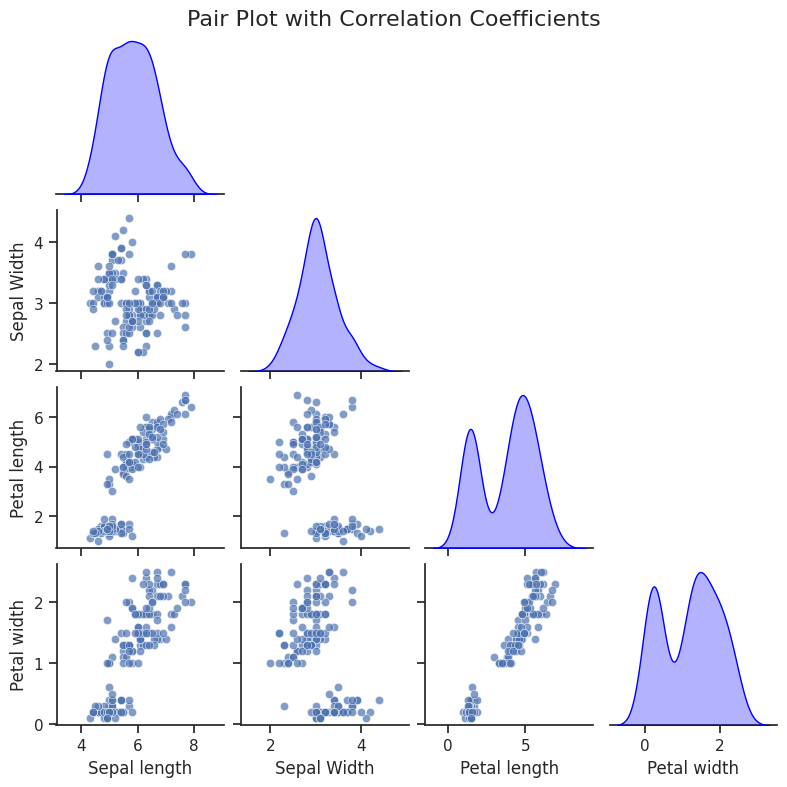

In [76]:
iris2 = iris.sample(frac=1)
# Define the panel correlation function
def panel_cor(x, y, digits=2, prefix="", cex_cor=None, **kwargs):
    r = np.abs(pearsonr(x, y)[0])
    txt = f"{prefix}{r:.{digits}f}"

    if cex_cor is None:
        cex_cor = 0.8 / plt.text(0, 0, txt).get_fontsize()

    ax = plt.gca()
    ax.annotate(txt, xy=(0.5, 0.5), xycoords=ax.transAxes, ha='center', va='center', fontsize=cex_cor * r)

# Set the plotting parameters
sns.set(style="ticks")
sns.set_context("notebook", rc={"lines.linewidth": 0.5})

# Create the pair plot with smooth scatter plots and correlation coefficients
g = sns.pairplot(iris2.iloc[:, :-1], diag_kind="kde", plot_kws={"alpha": 0.7}, height=2, markers="o",
                 diag_kws={"color": "blue", "shade": True, "alpha": 0.3},
                 corner=True,
                 #corner_kws={"hist_kws": {"color": "blue", "alpha": 0.3, "edgecolor": "k"}, "kde_kws": {"color": "blue"}}
                 )

# Add the panel correlation function to the upper panels
g.map_upper(panel_cor)

# Adjust layout
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pair Plot with Correlation Coefficients', size=16)

# Show the plot
plt.show()



In [77]:

# Permutate the dataset in a row-wise manner to shuffle the data

# Create a distance matrix for all the pairwise combination of objects
iris_dist = pd.DataFrame(squareform(pdist(iris2.iloc[:, :4], metric='euclidean')), columns=iris2.index, index=iris2.index)

# Display the distance matrix
print(iris_dist)



          21        103       131       28        134       148       4    \
21   0.000000  5.568662  5.388877  0.728011  6.355313  4.628175  1.122497   
103  5.568662  0.000000  0.300000  4.991994  1.240967  1.004988  4.697872   
131  5.388877  0.300000  0.000000  4.801042  1.410674  0.836660  4.545327   
28   0.728011  4.991994  4.801042  0.000000  5.805170  4.036087  1.014889   
134  6.355313  1.240967  1.410674  5.805170  0.000000  2.118962  5.391660   
..        ...       ...       ...       ...       ...       ...       ...   
36   0.774597  5.046781  4.853864  0.264575  5.818075  4.106093  1.009950   
120  4.482187  1.303840  1.081665  3.885872  2.445404  0.458258  3.748333   
61   3.682391  2.360085  2.126029  3.014963  3.103224  1.581139  2.983287   
71   4.582576  1.260952  1.039230  3.953479  2.071232  0.734847  3.770942   
51   4.737088  1.212436  1.148913  4.174925  1.652271  1.067708  3.786819   

          26        105       32   ...       3         24        141  \
21 

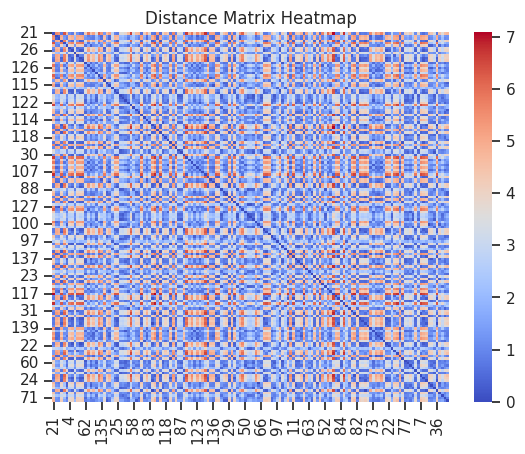

In [78]:
# Create a heatmap for the distance matrix
sns.heatmap(iris_dist, cmap="coolwarm")
plt.title('Distance Matrix Heatmap')
plt.show()


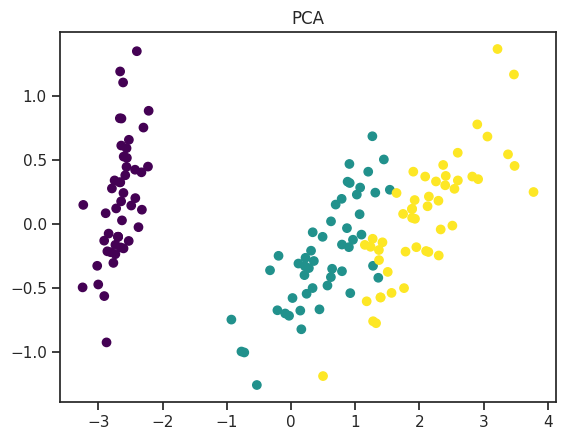

In [81]:
# Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.iloc[:, :4])

# Plot PCA
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('PCA')
plt.show()


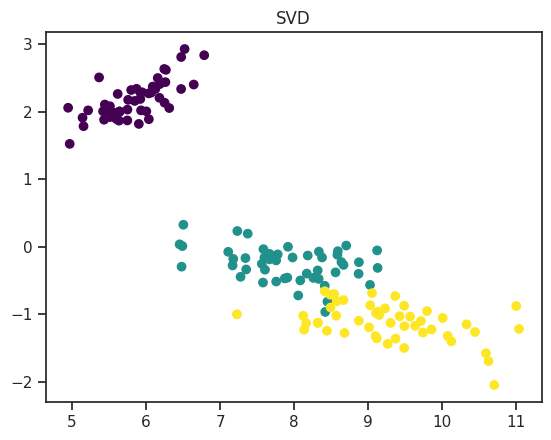

In [115]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap, LocallyLinearEmbedding

# SVD
svd = TruncatedSVD(n_components=2)
iris_svd = svd.fit_transform(iris.iloc[:, :4])

# Plot SVD
plt.scatter(iris_svd[:, 0], iris_svd[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('SVD')
plt.show()

In [86]:
# MDS
mds = MDS(n_components=2)
iris_mds = mds.fit_transform(1 - iris.iloc[:, :4].corr())



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [91]:
print("iris_mds dimensions:", iris_mds.shape)

# Assuming iris is a Pandas DataFrame with a 'Class' column
print("iris['Class'] dimensions:", iris['Class'].shape)
print("First few rows of iris DataFrame:")
print(iris.head())

# Assuming iris_mds is a NumPy array with shape (n_samples, 2)
# Display the first few rows of iris_mds
print("\nFirst few rows of iris_mds:")
print(iris_mds[:5])

iris_mds dimensions: (4, 2)
iris['Class'] dimensions: (149,)
First few rows of iris DataFrame:
   Sepal length  Sepal Width  Petal length  Petal width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa

First few rows of iris_mds:
[[-0.53070494 -0.11981719]
 [ 1.81952093 -0.37666369]
 [-0.68580832  0.23160759]
 [-0.60300766  0.26487329]]


In [ ]:
# Plot MDS
plt.scatter(iris_mds[:, 0], iris_mds[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('MDS')
plt.show()

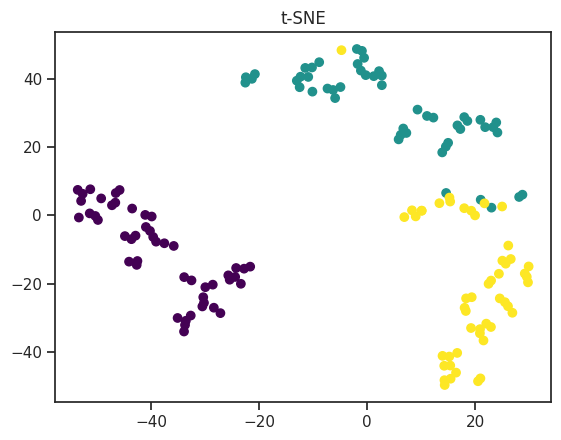

In [111]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=1)
iris_tsne = tsne.fit_transform(iris.iloc[:, :4])

# Plot t-SNE
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('t-SNE')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


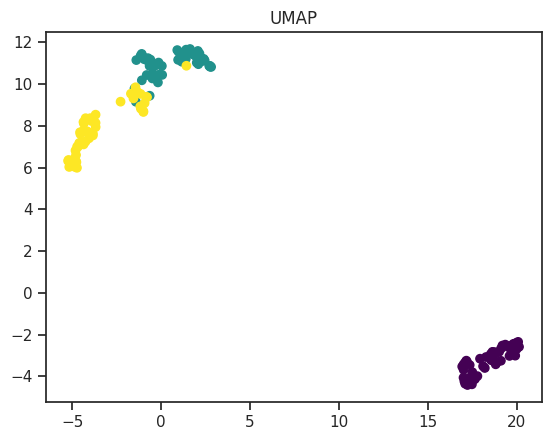

In [113]:
# UMAP
umap = UMAP(n_components=2, random_state=1)
iris_umap = umap.fit_transform(iris.iloc[:, :4])

# Plot UMAP
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('UMAP')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


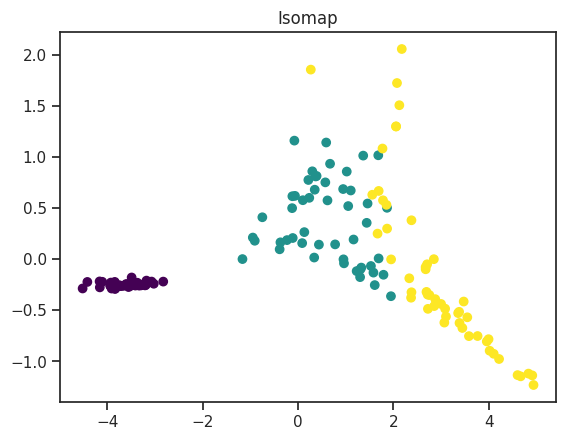

In [117]:
# Isomap
isomap = Isomap(n_components=2, n_neighbors=5)
iris_isomap = isomap.fit_transform(iris.iloc[:, :4])

# Plot Isomap
plt.scatter(iris_isomap[:, 0], iris_isomap[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('Isomap')
plt.show()

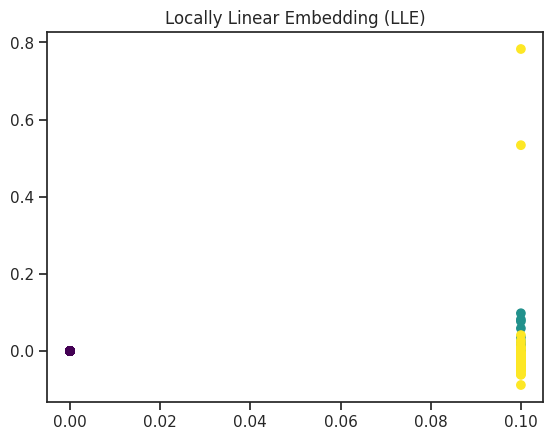

In [118]:
# LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
iris_lle = lle.fit_transform(iris.iloc[:, :4])

# Plot LLE
plt.scatter(iris_lle[:, 0], iris_lle[:, 1], c=iris['Class'].astype("category").cat.codes, cmap='viridis')
plt.title('Locally Linear Embedding (LLE)')
plt.show()